In [1]:
import numpy as np
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge



In [2]:
df = pd.read_csv("../Resources/non_race_data.csv")
df.head()

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3


In [3]:
X = df.drop(["year", "state", "id", "state_code", "latitude", "longitude", "deaths", "births", "maternal_mortality_ratio"], axis=1)
y = df["maternal_mortality_ratio"]
print(X.shape, y.shape)

(308, 33) (308,)


In [4]:
X = df.drop(["year", "state", "id", "state_code", "latitude", "longitude", "deaths", "births", "maternal_mortality_ratio"], axis=1)
y = df["maternal_mortality_ratio"].values.reshape(-1,1)
print(X.shape, y.shape)

(308, 33) (308, 1)


In [5]:
# Split data into train and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# define model
model_1 = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_1, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 7.517 (1.574)


In [8]:
y_train.shape

(231, 1)

In [9]:
X_train_scaled.shape

(231, 33)

In [10]:

# define model
model_3 = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_3, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -7.517
Config: {'alpha': 0.99}


In [11]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model_4 = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model_4.fit(X_train_scaled, y_train)
# summarize chosen configuration
print('alpha: %f' % model_4.alpha_)

alpha: 0.990000


In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

ValueError: x and y must have same first dimension, but have shapes (33,) and (1089,)

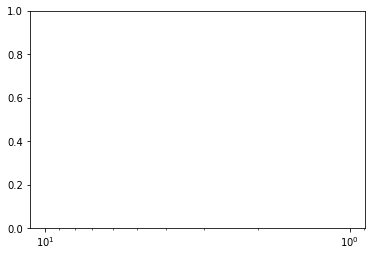

In [34]:
###initialize list to store coefficient values
coef=[]
n_alphas = 33
alphas = np.logspace(-10, -2, n_alphas)

ridgereg=Ridge(normalize=True)

for a in alphas:
    ridgereg.set_params(alpha=a)
    ridgereg.fit(X_train_scaled, y_train)
    coef.append(ridgereg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()

ax = plt.gca()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
#ax=fig.add_subplot(111)

coef_list = []
for array in coef:
    for item in array:
        for number in item:
            coef_list.append(number)
        
        
    
ax.plot(alphas,coef_list)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')
#fig.savefig('coef_vs_alpha.png')

In [ ]:
>>> from sklearn.linear_model import Ridge
>>> import numpy as np
>>> n_samples, n_features = 10, 5
#>>> rng = np.random.RandomState(0)
##>>> y = rng.randn(n_samples)
#>>> X = rng.randn(n_samples, n_features)
>>> clf = Ridge(alpha=1.0)
>>> clf.fit(X, y)
Ridge()

In [5]:
np.random.seed(0)

In [10]:
classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))


ValueError: x and y must be the same size

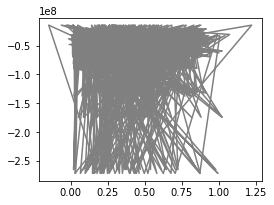

In [12]:
for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(231, 33)) + X_train_scaled
        clf.fit(this_X, y_train)

        ax.plot(X_test_scaled, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train_scaled, y_train)
    ax.plot(X_test_scaled, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train_scaled, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()